# Detect NEI Counts: Intermediate-frequency Nanoflares

In [1]:
import os
import glob
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
import numpy as np
import astropy.units as u
from astropy.visualization import AsinhStretch,ImageNormalize,SqrtStretch
import distributed
import dask

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA
from synthesizAR.atomic import EmissionModel
from synthesizAR.visualize import plot_aia_channels

%matplotlib inline

In [2]:
cluster = distributed.LocalCluster(n_workers=64,threads_per_worker=1)
client = distributed.Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:33761 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/field_checkpoint/')

In [4]:
em_model = EmissionModel.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/emission_model.json')

In [5]:
aia = InstrumentSDOAIA([0, 30000]*u.s,field.magnetogram.observer_coordinate)
observer = synthesizAR.Observer(field, [aia], parallel=True)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/sunpy-1.0.dev9869-py3.6-linux-x86_64.egg/sunpy/map/mapbase.py:645: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,


In [6]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/',
                              0.5 * u.Mm)

/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesized-timelags/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [ ]:
futures = observer.flatten_detector_counts(emission_model=em_model)

In [7]:
bin_futures = observer.bin_detector_counts('/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/')

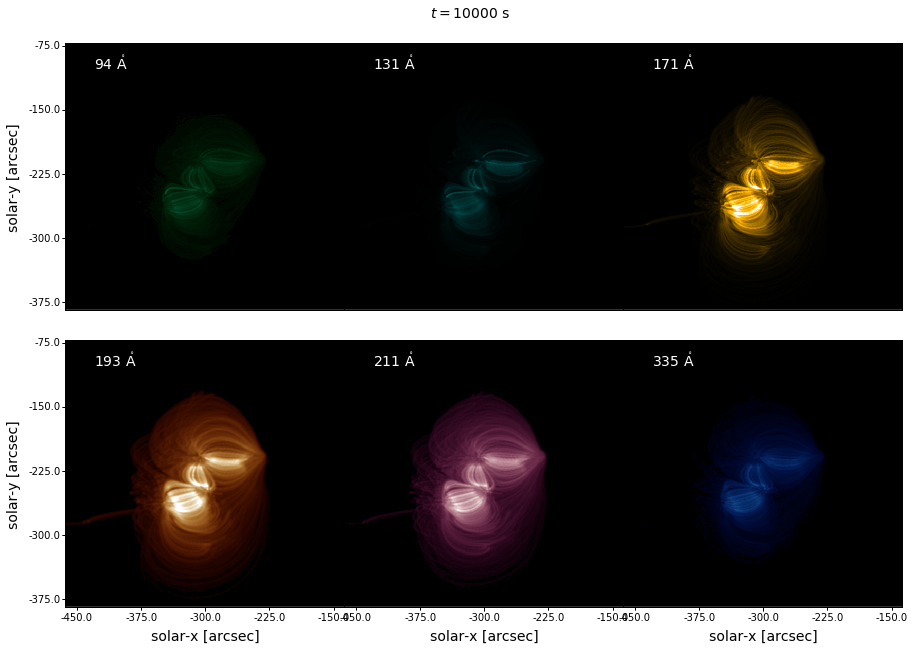

In [8]:
plot_aia_channels(aia,10000 * u.s, '/storage-home/w/wtb2/data/timelag_synthesis_v2/intermediate_frequency/nei/',
                  norm=ImageNormalize(stretch=SqrtStretch(),vmin=0,vmax=1e3))